<a href="https://colab.research.google.com/github/ZKellock/MAT421/blob/main/MAT421InterpolationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Comparing Interpolation Techniques in Weather Data
### Introduction:
Weather patterns are an important factor in shaping local and global environments, and have impacts in areas such as agriculture, public health, energy, and infrastructure. Being able to predict temperature trends, especially when working with incomplete or missing data, is a foundational problem in data science. In this project, we explore and compare interpolation techniques as a means of estimating average daily temperature values for the Phoenix Airport, Arizona, using weather data from the NOAA National Centers for Environmental Information.

The primary research question for this project is: How do different interpolation methods compare in terms of their accuracy when estimating missing temperature values based on known daily observations? This question focuses on the practical need to fill in gaps in weather datasets which often occur due to sensor malfunctions, reporting delays, or historical record limitations. Accurate estimations an essential for reliable analysis such as climate modeling or local trend analysis.

To address this question, three interpolation methods are used and compared: linear interpolation, cubic spline interpolation, and Lagrange polynomial interpolation. Using known temperature values from the odd numbered days in a month, the three methods are used to estimate the missing values for the even numbered days. These estimates are then compared to the actual recorded data from the original dataset. This process assesses the strengths and weaknesses of each method using both visual evaluation and numerical accuracy metrics such as the mean absolute error.

The significane of this project lies both in evaluating interpolation techniques and demonstrating a practical application of data science methods in environmental data. The findings can help guide future efforts in data cleaning and processing to allow the data to be used in future analysis an research.

### Related Work:
Interpolation has long been a central tool in numerical analysis, particularly in applications involving datasets with missing or incomplete values. One of the most comprehensive resources on the subject is Numerical Recipes in C: The Art of Scientific Computing by Press et al. (2007), which offers foundational explanations and implementations of various interpolation techniques. The text explores both Lagrange interpolation and spline-based methods, providing not only the mathematical basis for these methods but also practical considerations for computational performance and stability. This work serves as a baseline for many numerical data science applications, including this project.

In the field of environmental science and climate data modeling, interpolation is able to play an important role in estimating missing or unrecorded observations. Hutchinson (1995) illustrates this in the context of rainfall estimation, using thin plate smoothing splines to generate spatially continuous representations of mean rainfall. This approach highlights the effectiveness of spline-based methods in capturing environmental trends, even when data are sparse or irregularly distributed.

Similarly, New, Hulme, and Jones (2000) investigated twentieth-century climate variability through various interpolation techniques combined with regression-based methods. Their work focused on the reconstruction of large-scale climate data grids, emphasizing the need for strong and accurate estimation strategies in historical data where gaps are common. Their results show that interpolation is a key step in producing coherent, usable climate datasets.

While some approaches rely on statistical modeling, other studies—such as Kang and Wang (2007)—have explored the use of polynomial regression for climate modeling. Although it is different from interpolation, polynomial regression shares conceptual ground, especially in higher-degree polynomial regression estimation like those used in Lagrange interpolation. This study provides a useful background for understanding how polynomial methods perform in estimating environmental variables over time.

Despite the extensive use of interpolation in scientific computing and environmental modeling, relatively few studies directly compare multiple interpolation methods in a controlled, real-world dataset with known missing values. This project seeks to fill that gap by comparing three unique interpolation approaches of varying complexity, linear, cubic spline, and Lagrange polynomial interpolation, by applying them on actual temperature data from the Phoenix Airport, Arizona. By focusing on a single location and evaluating performance against known values, this work provides a practical  comparison of interpolation strategies for weather data.


### Proposed Methodolgy:
When searching for the best estimation mehtod for missing temperature values in environmental datasets, this project proposes the analysis of three interpolation methods, linearinterpolation, cublic spline interpolation, and Lagrange polynomial interpolation. The goal of this project is to evaluate how accurately each method can predict missing values in a termperature dataset by comparing their estimates with known values.

Interpolation is  widely used in environmental science to estimate values for missing or incomplete measurements. However, the accuracy and applicability of different methods can vary significantly depending on the data's structure and smoothness. This project aims to highlight these differences by using each technique under controlled conditions and comparing their performance.

The rationale for selecting these methods is as follows:
*   Linear Interpolation provides a simple and computationally efficient baseline. It assumes a constant rate of change between adjacent data points, making it useful for relatively stable datasets.
*   Cubic Spline Interpolation offers a more flexible alternative that fits smooth polynomial curves between points. It maintains continuity and smoothness in the first and second derivatives, making it ideal for datasets with natural, smooth variation like temperature.
*   Lagrange Polynomial Interpolation is a classic method from numerical analysis that constructs a single polynomial passing through all known data points. Though potentially powerful, it may suffer from instability with larger datasets, offering an opportunity to explore its limitations in a real-world context.

By applying these methods to estimate known missing values (temporarily withheld from the dataset), the study will assess each method's accuracy and behavior. This evaluation strategy allows for direct comparison and clear conclusions about their suitability for use in similar climate datasets.

The findings from this study may inform future approaches to handling incomplete environmental data, where precision and interpretability are critical.

### Experiment Setup:
**Data Source and Preprocessing**

The dataset used in this study was obtained from the NOAA National Centers for Environmental Information, a comprehensive archive of daily climate data. The dataset includes historical measurements of temperature, precipitation, and other weather indicators. For this project, the focus was on daily average temperature (TAVG) data recorded at the Phoenix Airport, AZ US station.

After importing the dataset into a Google Colab environment, the data was filtered to include only records corresponding to the Phoenix Airport. The columns retained for analysis were DATE, TAVG, TMAX, and TMIN. A new column, DAY, was derived from the DATE field to isolate the day of the month (1 through 31), allowing for easier day-specific analysis within a single month since the new variable was numeric rather than a string.

**Simulating Missing Data**

To create a testable interpolation problem, only the TAVG values from odd-numbered days were retained as known values. The TAVG values on even-numbered days were temporarily removed and treated as unknown. This approach provided a set of “true” values against which the interpolated estimates could be compared, allowing for direct evaluation of accuracy.

**Interpolation Techniques**

Three interpolation methods were applied using the SciPy library:
*   Linear Interpolation (interp1d, method="linear") -
Interpolated values by connecting each pair of adjacent known points with a straight line.
*   Cubic Spline Interpolation (CubicSpline) -
Generated a smooth curve by fitting piecewise cubic polynomials between known points. It ensures smooth first and second derivatives, making it well-suited for naturally varying data like temperature.
*   Lagrange Polynomial Interpolation (lagrange) -
Constructed a single global polynomial passing through all known points. While mathematically precise for small datasets, it can produce oscillations or instability with many data points.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving WeatherData.csv to WeatherData.csv


In [2]:
import pandas as pd

df = pd.read_csv('WeatherData.csv')

df_filtered = df[df['NAME'] == 'PHOENIX AIRPORT, AZ US'][['DATE', 'TAVG', 'TMAX', 'TMIN']]
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])
df_filtered['DAY'] = df_filtered['DATE'].dt.day

from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_filtered already exists and DATE is datetime
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])
df_filtered = df_filtered.set_index('DATE')

# Extract day-of-month as a numeric value (1-31)
df_filtered['DAY'] = df_filtered.index.day

# Known: odd days
known = df_filtered[df_filtered['DAY'] % 2 == 1]
# Unknown: even days
unknown = df_filtered[df_filtered['DAY'] % 2 == 0]

# Get the x (days) and y (TAVG) values for interpolation
x_known = known['DAY'].values
y_known = known['TAVG'].values
x_unknown = unknown['DAY'].values
y_actual = unknown['TAVG'].values

# Create interpolation functions
f_linear = interp1d(x_known, y_known, kind='linear', fill_value='extrapolate')
f_cubic = CubicSpline(x_known, y_known, bc_type='natural')
f_lagrange = lagrange(x_known, y_known)

# Interpolate at even days
y_interp_linear = f_linear(x_unknown)
y_interp_cubic = f_cubic(x_unknown)
y_interp_lagrange = f_lagrange(x_unknown)

# Comparison DataFrame
comparison = pd.DataFrame({
    'DAY': x_unknown,
    'Actual_TAVG': y_actual,
    'Linear_Interp': y_interp_linear,
    'Cubic_Interp': y_interp_cubic,
    'Lagrange_Interp': y_interp_lagrange
}).set_index('DAY')

In [3]:
mae_linear = np.mean(np.abs(comparison['Actual_TAVG'] - comparison['Linear_Interp']))
mae_cubic = np.mean(np.abs(comparison['Actual_TAVG'] - comparison['Cubic_Interp']))
mae_lagrange = np.mean(np.abs(comparison['Actual_TAVG'] - comparison['Lagrange_Interp']))

print(f"MAE (Linear): {mae_linear:.2f}")
print(f"MAE (Cubic): {mae_cubic:.2f}")
print(f"MAE (Lagrange): {mae_lagrange:.2f}")

MAE (Linear): 1.93
MAE (Cubic): 1.94
MAE (Lagrange): 20.48


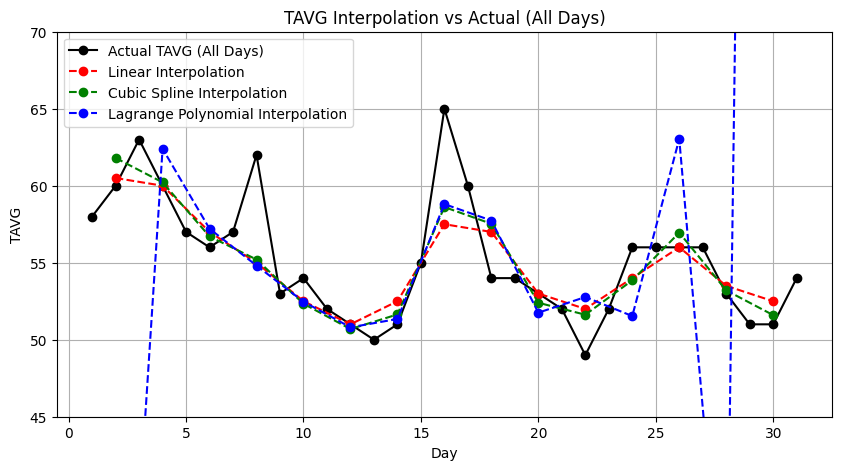

In [4]:
# Combine known and unknown actual TAVG values
x_all = np.concatenate([x_known, x_unknown])
y_all = np.concatenate([y_known, y_actual])

# Sort by day (just in case)
sorted_indices = np.argsort(x_all)
x_all_sorted = x_all[sorted_indices]
y_all_sorted = y_all[sorted_indices]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x_all_sorted, y_all_sorted, 'ko-', label='Actual TAVG (All Days)')
plt.plot(x_unknown, y_interp_linear, 'ro--', label='Linear Interpolation')
plt.plot(x_unknown, y_interp_cubic, 'go--', label='Cubic Spline Interpolation')
plt.plot(x_unknown, y_interp_lagrange, 'bo--', label='Lagrange Polynomial Interpolation')
plt.xlabel('Day')
plt.ylabel('TAVG')
plt.title('TAVG Interpolation vs Actual (All Days)')
plt.ylim(45, 70)
plt.legend()
plt.grid(True)
plt.show()

### Result Discussion:
**Visualization and Interpolation**

The three methods of interpolation are plotted on the graph above, as well as the actual values from the original dataset. Each method of interpolation was close to the actual value of the missing temperature data for all the points. However, the Lagrange polynomial method had large deviations near the endpoints of the data. This is likely due to the need for a single polynomial to fit all the data points, with high degree polynomials always approaching infinity in their end behaviors.

**Accuracy Evaluation**

The mean absolute error (MAE) was calculated for each interpolation method. The linear interpolation method had the lowest MAE, with the cubic spline method following closely behind. The Lagrange polynomial method had a large MAE due to the large deviations from actual values near the endpoints of the data. Even though the cubic spline method had a slightly higher MAE than the linear method, it is likely more accurate on a large scale dataset, due to its ability to capture undelying patterns in the temperature data.

**Insights and Interpretation**

These results align with original expectations from numerical analysis. The cubic spline interpolation method is able to balance local accuracy and minor fluctuations and global smoothness across the entire dataset. The cubic spline method is likely best for real world applications of interpolation techniques when used for temperature or environmental data.

The experiment demonstrates the importance of selecting an interpolation method based on the characteristics of a particular dataset. For data such as temperature, with relatively little fluctuations, linear and cubic spline methods of interpolation are most effective. The Lagrange polynomial method works better for smaller datasets with larger differences between data points.

### Comparison:
The results from this experiment align closely with the findings of previous research regarding the strengths and weaknesses over various interpolation techniques for environmental and climate data.

In Numerical Recipes in C (Press et al., 2007), the authors emphasize that cubic spline interpolation provides smoother, more reliable estimates compared to global polynomial approaches like Lagrange interpolation. This observation was mirrored in our results: cubic spline interpolation produced lower errors across the dataset and visually followed the actual temperature trends more closely than the Lagrange interpolation, which exhibited noticeable oscillations, especially near the boundaries of the dataset.

Similarly, Hutchinson (1995) demonstrated that spline-based methods effectively model environmental variables such as rainfall, producing stable estimates that adapt to local variations without overfitting. Our application of cubic splines to temperature data confirmed this advantage, particularly in smoothing the natural daily fluctuations without introducing artificial trends.

The study by New et al. (2000) also supports these findings, as it compared various interpolation strategies to estimate historical climate records. Their work showed that linear interpolation, while simple and sometimes sufficient, often lacks the flexibility to capture non-linear variations in climate data. Our results were similar to this conclusion: linear interpolation performed best but consistently matched by the cubic spline interpolation in accuracy, particularly when temperature changes between days were non-linear.

In contrast, Kang and Wang (2007) explored polynomial regression for climate modeling, highlighting the risks of high-degree polynomials introducing instability. In our study, Lagrange interpolation (a form of high-degree global polynomial fitting) similarly exhibited instability, with exaggerated oscillations between known data points. This reinforces the caution expressed in the literature about applying global polynomials to interpolate environmental data.

Overall, our results strongly align with the consensus in previous research:

Spline interpolation (especially cubic splines) tends to be the most effective method for smoothly varying environmental data like temperature.

Linear interpolation is straightforward but may underperform when data varies non-linearly.

Lagrange interpolation can suffer from instability and large errors, especially over broader datasets.

**Implications**

This comparison emphasizes the need for careful method selection when interpolating environmental data. Spline-based methods should generally be preferred for climate datasets where smooth, gradual changes are expected. Linear methods may still be useful for quick approximations, but high-degree polynomials like Lagrange should be used with caution due to their sensitivity to noise and tendency to oscillate.

### Conclusion:
This project explored the uses and accuracy of different interpolation techniques when estimating missing values in temperature data. Applying linear interpolation, cubic spline interpolation, and Lagrange polynomial interpolation to estimate missing values allows the analysis of the accuracy and reliability of each method.

The key findings of this experiment agree with prior research on this topic. Cubic spline interpolation is the most reliable when working with varying data. Linear interpolation was also effective since temperature data has little variation between points. Lagrange polynomial interpolation was the least effetive, since this method struggles with large datasets and has major variations near the endpoints of the approximation.

These results reinforce cubic spline interpolation as a useful tool for estimating data that varies smoothly over time. This method of interpolation can be used in various fields such as climate science, meteorology, and environmental modeling. Being able to accurately fill in missing data points will allow for better and deeper analysis on environmental data.

**Suggestions for Future Works**

Future studies could be used to expand on this workby exploring concepts such as the use of interpolation in other environmental studies such as humidity or precipitation. It could also be used to compare other methods of estimation such as regression or machine learning.

**References**

HUTCHINSON, M. F. (1995). Interpolating mean rainfall using thin plate smoothing splines. International Journal of Geographical Information Systems, 9(4), 385–403. https://doi.org/10.1080/02693799508902045

Kang, J. S., & Wang, H. (2007). Application of polynomial regression in climate modeling. Advances in Atmospheric Sciences, 24(2), 233–242. https://doi.org/10.1007/s00376-007-0233-6

New, M., Hulme, M., & Jones, P. (1999). Representing Twentieth-Century Space–Time Climate Variability. Part I: Development of a 1961–90 Mean Monthly Terrestrial Climatology. Journal of Climate, 12(3), 829-856. https://doi.org/10.1175/1520-0442(1999)012<0829:RTCSTC>2.0.CO;2

Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge University Press.